In [2]:
# Import the libraries required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns


# Load the Diamonds dataset from Seaborn
diamonds_data = sns.load_dataset("diamonds")
diamonds_data.head(5)





,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**STATISTICS challenge:**

In [3]:
diamonds_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
price_by_cut = diamonds_data.groupby('cut')['price']

C:\Users\nesat\AppData\Local\Temp\ipykernel_21276\1527096745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_cut = diamonds_data.groupby('cut')['price']


In [5]:
# calculate the mean of the price by cut

price_by_cut.mean()

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [6]:
# calculate the mean of the price by cut

mean_price_by_cut = diamonds_data.groupby('cut')['price'].mean()
mean_price_by_cut

C:\Users\nesat\AppData\Local\Temp\ipykernel_21276\2048661481.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_cut = diamonds_data.groupby('cut')['price'].mean()


cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [7]:
#calculate the standard deviation of the price by cut

price_by_cut.std()

cut
Ideal        3808.401172
Premium      4349.204961
Very Good    3935.862161
Good         3681.589584
Fair         3560.386612
Name: price, dtype: float64

In [8]:
# calculate the median of the price by cut

price_by_cut.median()

cut
Ideal        1810.0
Premium      3185.0
Very Good    2648.0
Good         3050.5
Fair         3282.0
Name: price, dtype: float64

In [9]:
# calculate the mode of the price by cut

price_pivot = diamonds_data.pivot_table(values='price', index='cut', aggfunc='count')

mode_by_cut = price_pivot.mode(axis=1)

mode_by_cut

C:\Users\nesat\AppData\Local\Temp\ipykernel_21276\1577074210.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  price_pivot = diamonds_data.pivot_table(values='price', index='cut', aggfunc='count')


,0
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [10]:
# calculate the variance of the price by cut

price_by_cut.var()

cut
Ideal        1.450392e+07
Premium      1.891558e+07
Very Good    1.549101e+07
Good         1.355410e+07
Fair         1.267635e+07
Name: price, dtype: float64

In [11]:
# calculate the 25 and 75 percentile of the price by cut

price_by_cut.quantile([0.25, 0.75])

cut            
Ideal      0.25     878.00
           0.75    4678.50
Premium    0.25    1046.00
           0.75    6296.00
Very Good  0.25     912.00
           0.75    5372.75
Good       0.25    1145.00
           0.75    5028.00
Fair       0.25    2050.25
           0.75    5205.50
Name: price, dtype: float64

In [12]:
# calculate the range of the price by cut

price_range_by_cut = price_by_cut.max()- price_by_cut.min()

price_range_by_cut


cut
Ideal        18480
Premium      18497
Very Good    18482
Good         18461
Fair         18237
Name: price, dtype: int64

In [13]:
# bonus 1:
# is there a correlation between the price and the carat? If so, what kind of correlation is it?
# what about covariance?

correlation = diamonds_data['carat'].corr(diamonds_data['price'])

print("Correlation between price and carat:", correlation)

# The result of correlation is 0.92. If the result is higher than 0, that means it is positive correlation. When the carat increases, price also increases.


Correlation between price and carat: 0.921591301193476


In [14]:
# bonus 2 if you have a lot of time:
# make a function on your own that calculates the standard deviation of a list of numbers (you can find the formula in last weeks slides)





In [15]:
# 1. Boxplot of Diamond Price Vs Cut






C:\Users\nesat\AppData\Local\Temp\ipykernel_21276\3849648902.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(diamonds_data.groupby('color')['price'].mean())


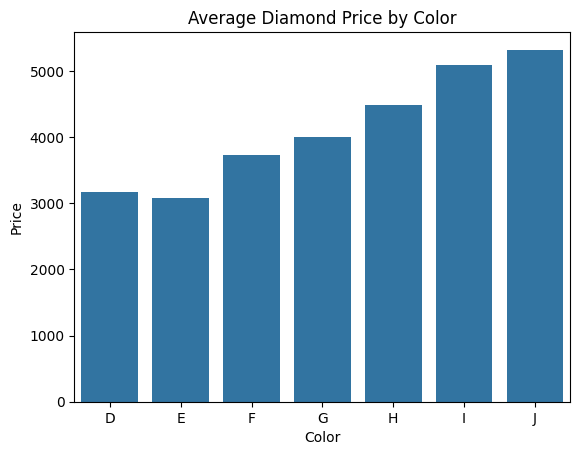

In [16]:
# 2. Barplot: Average Diamond Price by Color

sns.barplot(diamonds_data.groupby('color')['price'].mean())
plt.xlabel("Color")
plt.ylabel("Price")
plt.title("Average Diamond Price by Color")
plt.show()

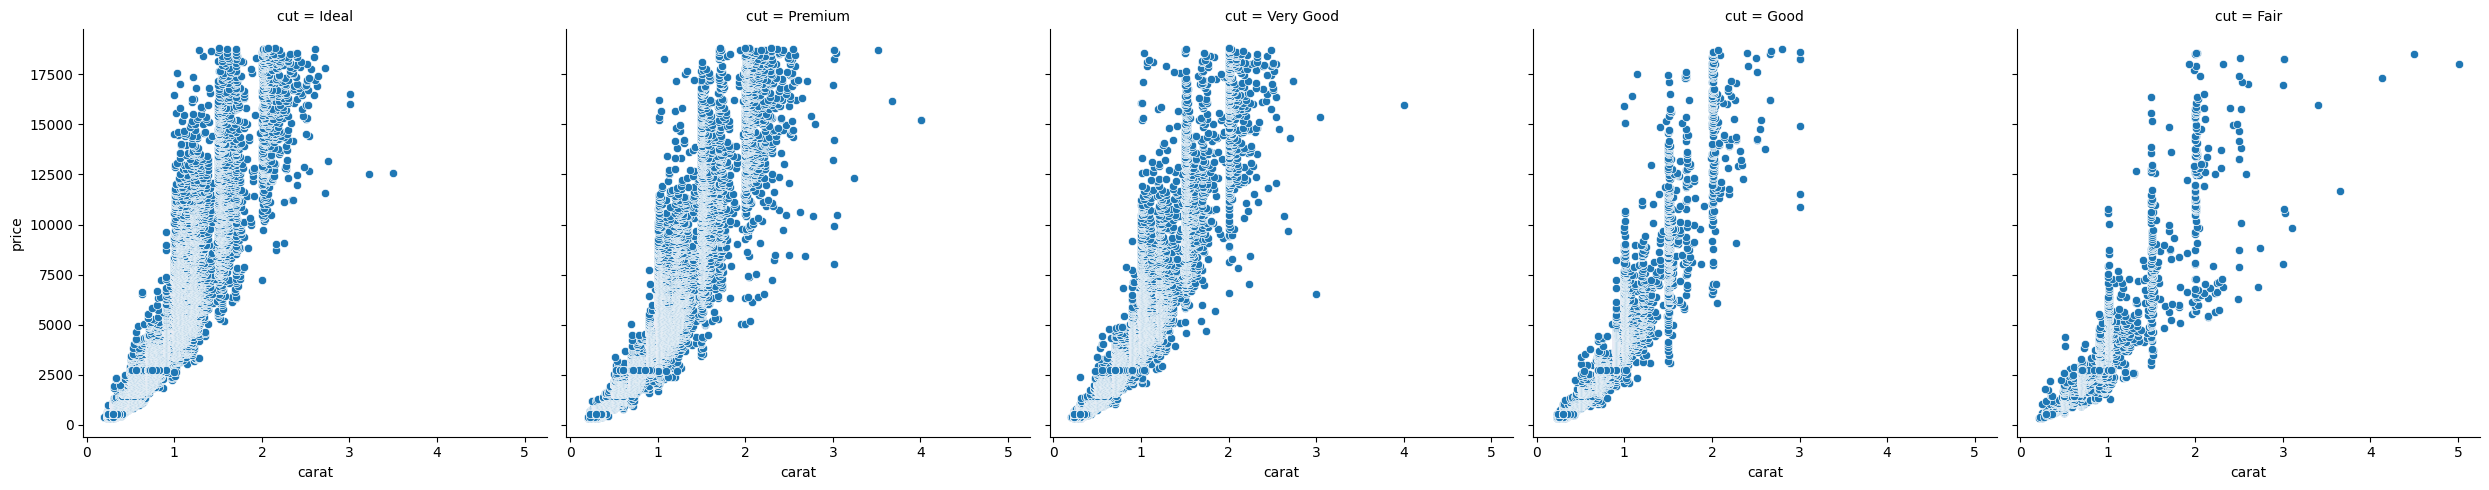

In [17]:
# 3. Scatterplot with Facets: Scatterplot of Carat vs. Price by Cut

sns.relplot(x='carat', y='price', col='cut', data=diamonds_data, kind='scatter')

plt.show()


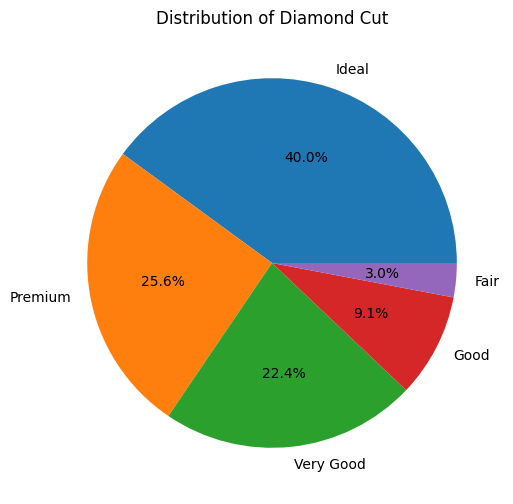

In [27]:
# 4. Pie Chart: Distribution of Diamond Cut

plt.figure(figsize=(8, 6))
plt.pie(diamonds_data['cut'].value_counts(), labels=diamonds_data['cut'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Diamond Cut')
plt.show()


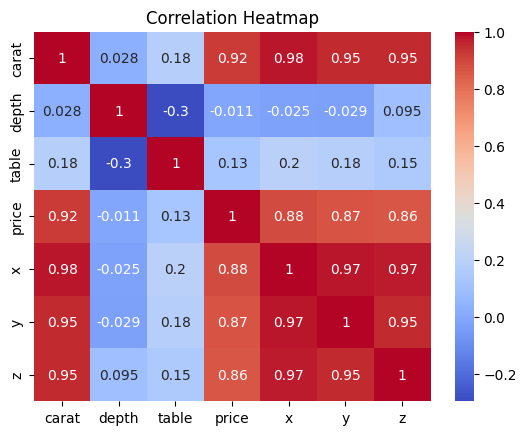

In [26]:
# Create a correlation matrix

numeric_diamonds = diamonds_data.select_dtypes(include=['number'])

correlation_matrix = numeric_diamonds.corr()

# Create a correlation plot

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()